# Pydicom Library

## Exemple of use of pydicom library on Nuclear Medicine imaging (TEMP)

In [39]:
#import library
import dicom as dcm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
# open dicom file (works for all .dcm file)
File=dcm.read_file('data/tomo1.dcm')
print(File)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TOMO', 'EMISSION']
(0008, 0016) SOP Class UID                       UI: Nuclear Medicine Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.6.1.68089.30900111062915055740600000002
(0008, 0020) Study Date                          DA: '20110629'
(0008, 0021) Series Date                         DA: '20110629'
(0008, 0022) Acquisition Date                    DA: '20110629'
(0008, 0023) Content Date                        DA: '20110629'
(0008, 0030) Study Time                          TM: '133104.671000'
(0008, 0031) Series Time                         TM: '170711'
(0008, 0032) Acquisition Time                    TM: '170711.000000'
(0008, 0033) Content Time                        TM: '170711.000000'
(0008, 0050) Accession Number                    SH: '20110629135645'
(0008, 0060) Modality                            

## Acces to Dicom datas

###  Architecture of DICOM :
### https://dicom.innolitics.com/ciods/cr-image

In [30]:
#Using dicom sequence name 

print 'Image type :',  File.ImageType 
print 'Image type first element :', File.ImageType[0]
print 'Modality: ',  File.Modality
print
# Type of datas
# Note that they are all string, so need a coversion to (float, int...) to use
print 'type of ImageType dicom sequence : ', type(File.ImageType)
print 'type of first element of ImageType dicom sequence : ', type(File.ImageType[0])

print
pixelSpacing=File.PixelSpacing
print 'pixel spacing :', pixelSpacing
print 'length pixel spacing sequence :', len(pixelSpacing)
print 'type pixel spacing :', pixelSpacing[0]


Image type : ['ORIGINAL', 'PRIMARY', 'TOMO', 'EMISSION']
Image type first element : ORIGINAL
Modality:  NM

type of ImageType dicom sequence :  <class 'dicom.multival.MultiValue'>
type of first element of ImageType dicom sequence :  <type 'str'>

pixel spacing : ['4.7951998710632', '4.7951998710632']
length pixel spacing sequence : 2
type pixel spacing : 4.7951998710632


In [31]:
#using tag (hexadecimal)

#print Dicom sequence of ... i don't know which one :) 
print File[0x033, 0x1010]

#print value of this sequence 
print File[0x033, 0x1010].value

#For dicom sequence containing sub-dicom-sequence
#affiche les valeurs du premier champ 'Radialposition' de la sequence Detector information Sequence
#print 'Detector Information Sequence' dicom sequence 
print(File[0x054, 0x022])

#print 'Radialposition' First sub sequence of 'Detector Information Sequence' dicom sequence
print(File[0x054, 0x022][0][0x018, 0x1142].value)

(0033, 1010) [COR Data for Detector 1]           FL: [0.15772351622581482, 0.15700672566890717, 0.15628992021083832, 0.15557312965393066, 0.154856339097023, 0.15413953363895416, 0.1534227430820465, 0.15270595252513885, 0.15198914706707, 0.15127235651016235, 0.1505555659532547, 0.14983876049518585, 0.1491219699382782, 0.14840517938137054, 0.1476883739233017, 0.14697158336639404, 0.1462547928094864, 0.14553798735141754, 0.1448211967945099, 0.14410440623760223, 0.1433876007795334, 0.14267081022262573, 0.14195401966571808, 0.14123721420764923, 0.14052042365074158, 0.13980363309383392, 0.13908682763576508, 0.13837003707885742, 0.13765324652194977, 0.13693644106388092, 0.13621965050697327, 0.1355028599500656, 0.13478605449199677, 0.1340692639350891, 0.13335247337818146, 0.1326356679201126, 0.13191887736320496, 0.1312020868062973, 0.13048528134822845, 0.1297684907913208, 0.12905170023441315, 0.1283348947763443, 0.12761810421943665, 0.126901313662529, 0.12618450820446014, 0.1254677176475525, 0

In [34]:
# Search dicom sequence with 'name' chain
print File.dir('name')
print 
# Search dicom sequence with 'energy' chain
print File.dir('energy')   

['InstitutionName', 'ManufacturerModelName', 'OperatorsName', 'PatientName', 'ProtocolName', 'ReferringPhysicianName', 'StationName']

['EnergyWindowInformationSequence', 'EnergyWindowVector', 'NumberOfEnergyWindows']


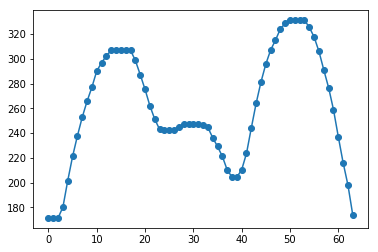

In [37]:
#Exemple of plot using radial position value 

pos_radial_0 = File[0x054, 0x022][0][0x018, 0x1142].value
pos_radial_0= [float(val) for val in pos_radial_0]  #Note the loop to convert string into float into the 'list' pos_radial_0

pos_radial_1 = File[0x054, 0x022][1][0x018, 0x1142].value
pos_radial_1 = [float(val) for val in pos_radial_1]  #Note the loop to convert string into float into the 'list' pos_radial_1


#Use matplotlib to plot result 
plt.plot(pos_radial_1+pos_radial_0, 'o-', label='detecteur 1+2');


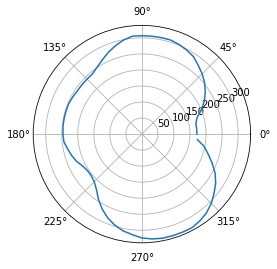

In [40]:
# this polar plot with the same values describes camera trajectory surronding patient
plt.polar([2*np.pi*l/64 for l in range(64)],pos_radial_1+pos_radial_0);

## Acces to Image pixel map

In [44]:
# Acces to image pixel data 
arr_image = File.pixel_array
print type(arr_image)
print 'Image Dimension : ', File.pixel_array.shape

<type 'numpy.ndarray'>
Image Dimension :  (320, 128, 128)


## Creation of a dictionary on the  Energy Windows (there are 5)

In [46]:
# Looking for dicom sequence
File.dir('energy')

['EnergyWindowInformationSequence',
 'EnergyWindowVector',
 'NumberOfEnergyWindows']

In [55]:
print File.EnergyWindowInformationSequence
print 
print 'there are', len(File.EnergyWindowInformationSequence), 'energies'

[(0054, 0013)  Energy Window Range Sequence   1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit           DS: '228.47500610352'
   (0054, 0015) Energy Window Upper Limit           DS: '265.52499389648'
   ---------
(0054, 0018) Energy Window Name                  SH: '111 Indium'(0054, 0013)  Energy Window Range Sequence   1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit           DS: '159.10000610352'
   (0054, 0015) Energy Window Upper Limit           DS: '184.89999389648'
   ---------
(0054, 0018) Energy Window Name                  SH: '111 Indium'(0054, 0013)  Energy Window Range Sequence   1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit           DS: '203.77500915527'
   (0054, 0015) Energy Window Upper Limit           DS: '228.47500610352'
   ---------
(0054, 0018) Energy Window Name                  SH: 'Lower Scatter'(0054, 0013)  Energy Window Range Sequence   1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit           DS: '133.30000305176'


In [56]:
# Example of two way to acces to Sequence Data
#for energy in File.EnergyWindowInformationSequence:

print File.EnergyWindowInformationSequence[0].EnergyWindowRangeSequence[0].EnergyWindowLowerLimit
print File.EnergyWindowInformationSequence[0][0x054, 0x013][0][0x054, 0x014].value

228.47500610352
228.47500610352


In [60]:
#Dictionary creation 
dic_energy={}

# Loop on every energy of EnergyWindowInformationSequence and collect data 
for energy in File.EnergyWindowInformationSequence:
    low=float(energy[0x054, 0x013][0][0x054, 0x014].value)
    high=float(energy[0x054, 0x013][0][0x054, 0x015].value)
    width=high-low
    pic=(high+low)/2
    pic_name=round((high+low)/2, 0)        #round to get int part 
    dic_energy[pic_name]={}
    dic_energy[pic_name]['low']=low
    dic_energy[pic_name]['high']=high
    dic_energy[pic_name]['width']=width
    dic_energy[pic_name]['pic']=pic
    
    

In [62]:
dic_energy

{146.0: {'high': 159.10000610352,
  'low': 133.30000305176,
  'pic': 146.20000457764002,
  'width': 25.80000305176},
 172.0: {'high': 184.89999389648,
  'low': 159.10000610352,
  'pic': 172.0,
  'width': 25.799987792959996},
 192.0: {'high': 198.66000366211,
  'low': 184.89999389648,
  'pic': 191.779998779295,
  'width': 13.760009765630002},
 216.0: {'high': 228.47500610352,
  'low': 203.77500915527,
  'pic': 216.125007629395,
  'width': 24.699996948250003},
 247.0: {'high': 265.52499389648,
  'low': 228.47500610352,
  'pic': 247.0,
  'width': 37.049987792959996}}